In [ ]:
#Import the libraries
import pandas as pd
import numpy as np

**Summarizing and Computing Descritive Statistics**

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
#finding the sum of the columns
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
#finding sum row wise
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
#finding sum row wise
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
#Finding mean of the data
df.mean()

one    3.083333
two   -2.900000
dtype: float64

In [ ]:
#Finding means with considering NaN observation
df.mean(skipna=False)

one   NaN
two   NaN
dtype: float64

In [ ]:
#Finding means of every row
df.mean(axis=1)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
#Finding index value of the minimum or maximum values
df.idxmax()

one    b
two    d
dtype: object

In [ ]:
df.idxmin()

one    d
two    b
dtype: object

In [ ]:
#Finding the cumulative sum
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [ ]:
#Descriptive summary statistics
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [ ]:
#Summary statistics on non-numeric data iwll produce count
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

**Correlation and Covariance**


In [ ]:
#Data scrapping from web
#conda install pandas-datareader  - on local machines we may run this
import pandas_datareader.data as web

In [ ]:
all_data = {ticker: web.get_data_yahoo(ticker) 
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [ ]:
all_data

{'AAPL':                   High         Low  ...       Volume   Adj Close
 Date                                ...                         
 2015-10-28   29.825001   29.014999  ...  342205600.0   27.554773
 2015-10-29   30.172501   29.567499  ...  204909200.0   27.845867
 2015-10-30   30.305000   29.862499  ...  197461200.0   27.607912
 2015-11-02   30.340000   29.902500  ...  128813200.0   27.996040
 2015-11-03   30.872499   30.174999  ...  182076000.0   28.317165
 ...                ...         ...  ...          ...         ...
 2020-10-19  120.419998  115.660004  ...  120639300.0  115.980003
 2020-10-20  118.980003  115.629997  ...  124423700.0  117.510002
 2020-10-21  118.709999  116.449997  ...   89946000.0  116.870003
 2020-10-22  118.040001  114.589996  ...  101988000.0  115.750000
 2020-10-23  116.550003  114.279999  ...   82396600.0  115.040001
 
 [1257 rows x 6 columns],
 'GOOG':                    High          Low  ...   Volume    Adj Close
 Date                            

In [ ]:
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

In [ ]:
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

In [ ]:
#compute percent changes of the prices, a time series operation
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-10-19,-0.025542,-0.003256,-0.024766,-0.024412
2020-10-20,0.013192,-0.064930,0.002007,0.013893
2020-10-21,-0.005446,-0.019681,0.000699,0.024024
2020-10-22,-0.009583,0.006084,0.000419,0.013820
2020-10-23,-0.006134,0.002073,0.006236,0.015892


In [ ]:
#corr method of Series computes the correlation of the overlapping, non-NA,
#aligned-by-index values in two Series
returns['MSFT'].corr(returns['IBM'])

0.572546403935051

In [ ]:
#cov computes the covariance
returns['MSFT'].cov(returns['IBM'])

0.00015994582696348168

In [ ]:
#other way of writing correlation command
returns.MSFT.corr(returns.IBM)

0.572546403935051

In [ ]:
#finding the correlation of all the variables
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.489835,0.717002,0.661342
IBM,0.489835,1.000000,0.572546,0.525893
MSFT,0.717002,0.572546,1.000000,0.780242
GOOG,0.661342,0.525893,0.780242,1.000000


In [ ]:
#finding the covariance of all the variables
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000354,0.000148,0.000234,0.000205
IBM,0.000148,0.000259,0.000160,0.000139
MSFT,0.000234,0.000160,0.000301,0.000223
GOOG,0.000205,0.000139,0.000223,0.000271


In [ ]:
#compute pairwise correlations
returns.corrwith(returns.IBM)

AAPL    0.489835
IBM     1.000000
MSFT    0.572546
GOOG    0.525893
dtype: float64

In [ ]:
#Passing a DataFrame computes the correlations of matching column names. 
#Here we compute correlations of percent changes with volume
returns.corrwith(volume)

AAPL   -0.104790
IBM    -0.079880
MSFT   -0.095464
GOOG   -0.179120
dtype: float64

In [ ]:
#Passing axis='columns' does things row-by-row instead
returns.corrwith(volume, axis='columns')

Date
2015-10-28         NaN
2015-10-29    0.590877
2015-10-30   -0.197956
2015-11-02    0.443080
2015-11-03    0.285229
                ...   
2020-10-19   -0.423485
2020-10-20    0.296463
2020-10-21   -0.270704
2020-10-22   -0.915214
2020-10-23   -0.804055
Length: 1257, dtype: float64

**Unique Values, Value Counts, Memberships**

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
#Finding unique objects
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
#sorted unique objects can also be displayed
uniques.sort()

In [ ]:
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

In [ ]:
#finding the count of the object occurrences
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [ ]:
#sorted indexes with count of their occurrences
pd.value_counts(obj.values, sort=False)

b    2
c    3
d    1
a    3
dtype: int64

In [ ]:
#Membership check operator
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [ ]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
#Finding an index array from an array of possibly non-distinct values 
#into another array of distinct values
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In [ ]:
#Compute a histogram on multiple related columns in a DataFrame and 
#for that some processing is required as shown below
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


**GROUPBY MECHANICS (10.1)**

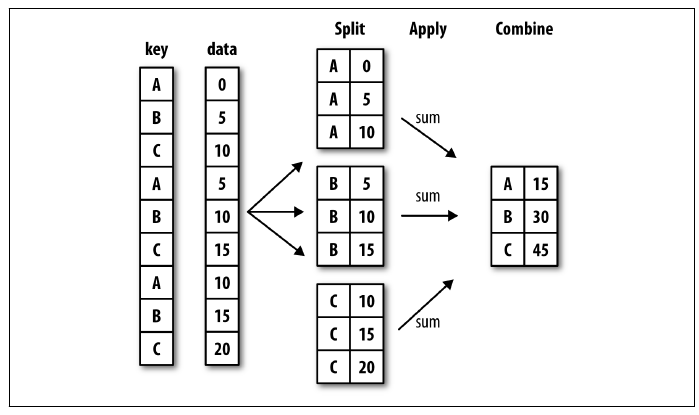

Illustration of a Group Aggregation

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.383222,-0.354928
1,a,two,-0.074126,-0.161896
2,b,one,-0.852126,-0.915858
3,b,two,0.953120,0.153948
4,a,one,-0.447949,0.217212


In [ ]:
#grouping data1 for each label in key1
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
#computing mean of data1 for groups from key1
grouped.mean()

key1
a   -0.301766
b    0.050497
Name: data1, dtype: float64

In [ ]:
#finding means of data1 across groups of key1 and key2
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.415586
      two    -0.074126
b     one    -0.852126
      two     0.953120
Name: data1, dtype: float64

In [ ]:
#instead of heirarchical keys, we can unstack the data to look like a table
means.unstack()

key2,one,two
key1,,
a,-0.415586,-0.074126
b,-0.852126,0.953120


In [ ]:
#grouping for key1
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.301766,-0.099871
b,0.050497,-0.380955


In [ ]:
#grouping for key1 and key2
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one  -0.415586 -0.068858
     two  -0.074126 -0.161896
b    one  -0.852126 -0.915858
     two   0.953120  0.153948

In [ ]:
#returns a Series containing group sizes
#any missing values in a group key will be excluded from the result
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

**Iterating over Groups**

In [ ]:
for name, group in df.groupby('key1'):
  print(name)
  print(group)

a
  key1 key2     data1     data2
0    a  one -0.383222 -0.354928
1    a  two -0.074126 -0.161896
4    a  one -0.447949  0.217212
b
  key1 key2     data1     data2
2    b  one -0.852126 -0.915858
3    b  two  0.953120  0.153948


In [ ]:
#we can iterate over dataframe using keys as well
for (k1, k2), group in df.groupby(['key1', 'key2']):
  print((k1, k2))
  print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.383222 -0.354928
4    a  one -0.447949  0.217212
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.074126 -0.161896
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.852126 -0.915858
('b', 'two')
  key1 key2    data1     data2
3    b  two  0.95312  0.153948


In [ ]:
#computing a dict of the data pieces as a one-liner
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one -0.383222 -0.354928
 1    a  two -0.074126 -0.161896
 4    a  one -0.447949  0.217212, 'b':   key1 key2     data1     data2
 2    b  one -0.852126 -0.915858
 3    b  two  0.953120  0.153948}

In [ ]:
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.852126,-0.915858
3,b,two,0.953120,0.153948


In [ ]:
#checking the datatype of each element of the dataframe
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [ ]:
#we can change the axis of groupy to make it row-wise
grouped = df.groupby(df.dtypes, axis=1)
grouped

In [ ]:
for dtype, group in grouped:
  print(dtype)
  print(group)

float64
      data1     data2
0 -0.383222 -0.354928
1 -0.074126 -0.161896
2 -0.852126 -0.915858
3  0.953120  0.153948
4 -0.447949  0.217212
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


**Selecting a Column or Subset of Columns**

In [ ]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [ ]:
#similar to
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [ ]:
#it may be desirable to aggregate only a few columns
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.068858
     two  -0.161896
b    one  -0.915858
     two   0.153948

In [ ]:
#by storing the groups and then computing the mean
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped.mean()

key1  key2
a     one    -0.068858
      two    -0.161896
b     one    -0.915858
      two     0.153948
Name: data2, dtype: float64